# Fashion MNIST

## References
- https://www.kaggle.com/datasets/zalando-research/fashionmnist
- https://github.com/zalandoresearch/fashion-mnist
- https://keras.io/api/datasets/fashion_mnist/

## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Input, Dense

import matplotlib.pyplot as plt

print(f'Numpy v{np.__version__}')
print(f'Pandas v{pd.__version__}')
print(f'TensorFlow v{tf.__version__}')

Numpy v2.3.5
Pandas v2.3.3
TensorFlow v2.20.0


## Load the data

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

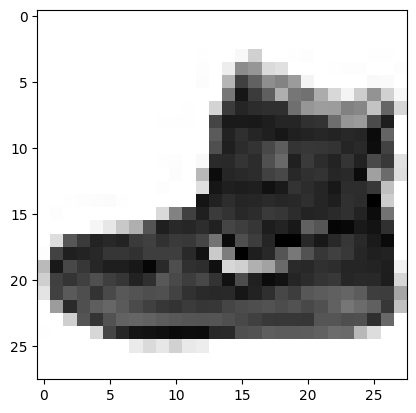

In [3]:
plt.imshow(x_train[0], cmap='Greys');

## Transform the data

It reshapes the 3D array in a 2D version where the columns are the pixels of the image flattened in 1 array.

For the labels, it applies one-hot encoding.

In [4]:
x_train = x_train.reshape(60000, 784) / 255
x_test = x_test.reshape(10000, 784) / 255

In [5]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

## Model creation

In [6]:
model = Sequential(
    name='ZalandoFashionMNIST',
    layers=[
        Input(shape=(x_train.shape[1], )),
        Dense(30, activation=tf.nn.relu),
        Dense(20, activation=tf.nn.relu),
        Dense(10, activation=tf.nn.softmax)
    ]
)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "ZalandoFashionMNIST"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │        23,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,380 (95.23 KB)

 Trainable params: 24,380 (95.23 KB)

 Non-trainable params: 0 (0.00 B)

## Training

In [ ]:
history = model.fit(x_train, y_train, epochs=20, batch_size=100, verbose=False)

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show();

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show();

## Evaluation

In [ ]:
la = model.evaluate(x_test, y_test, verbose=False)

## Prediction

In [ ]:
y_probs = model.predict(x_test)

In [ ]:
y_pred = np.argmax(y_probs, axis=1)

In [ ]:
classes = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

In [ ]:
image = 9312
print(f'Predicted: {classes[y_pred[image]]}')
print(f'Actual: {classes[np.argmax(y_test[image])]}')
plt.imshow(x_test[image].reshape(28, 28), cmap='Greys');